In [1]:
import tensorflow as tf
import os
import cv2
import numpy as np
import random as rnd

from tensorflow.keras import datasets, layers, models, optimizers
import matplotlib.pyplot as plt
from DataAugmentation import normalizeImage

In [2]:
image_dim = 32

In [3]:
original = np.load(r'data/images/augmented/original.npy', allow_pickle=True)

original_images = []
original_labels = []

for idx, d in enumerate(original):
    original_images.extend(d)
    for e in d:
        original_labels.append([idx])

original_images = np.array(original_images)
original_labels = np.array(original_labels)

p = np.random.permutation(len(original_images))
original_images = original_images[p]
original_labels = original_labels[p]

In [4]:
dataset = np.load(r'data/images/augmented/augmentation.npy', allow_pickle=True)

images = []
labels = []

for idx, d in enumerate(dataset):
    images.extend(d)
    for e in d:
        labels.append([idx])

In [5]:
images = np.array(images)
labels = np.array(labels)

In [6]:
p = np.random.permutation(len(images))
images = images[p]
labels = labels[p]

In [7]:
ratio = 1

train_images, train_labels = images[:int(len(images)*ratio)], labels[:int(len(images)*ratio)]
test_images, test_labels = images[int(len(images)*ratio):], labels[int(len(images)*ratio):]

In [8]:
model = models.Sequential()
model.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(image_dim, image_dim, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(512, (2, 2), activation='relu'))


model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.33))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(4, activation='relu'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 128)       3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 256)       295168    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 256)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 5, 512)         524800    
_________________________________________________________________
flatten (Flatten)            (None, 12800)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               1

In [10]:
opt = optimizers.Adam(learning_rate=1e-7)
model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=20, batch_size=16, shuffle=True, 
                    validation_data=(original_images, original_labels), validation_split=0.5)

Epoch 1/20
 7870/14915 [==============>...............] - ETA: 34s - loss: 1.8642 - accuracy: 0.3539

KeyboardInterrupt: 

C:\Users\Philipp\anaconda3\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:646: RuntimeWarning: divide by zero encountered in log10
  numdigits = int(np.log10(self.target)) + 1


OverflowError: cannot convert float infinity to integer

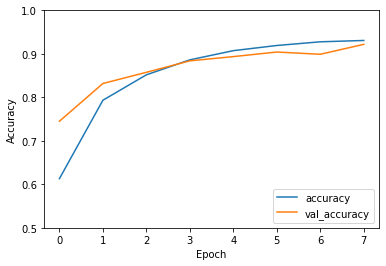

In [11]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

In [ ]:
print(test_acc)

In [ ]:
class_names = ['Bottle opener', 'Can opener', 'Cork screw', 'Multitool']
start = rnd.randint(0, len(test_images) - 25)

preds = model.predict(test_images[start:start+25])
index_max = []
for pred in preds:
    index_max.append(np.argmax(pred))

fig = plt.figure(figsize=(10, 10))
fig.patch.set_facecolor('xkcd:mint green')
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i+start])
    plt.tight_layout()
    plt.xlabel(
        'Actual: ' + class_names[test_labels[i+start][0]] +
        '\nPredicted: ' + class_names[index_max[i]])

In [61]:
model.save('models/v5')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: models/v5\assets


In [70]:
model = tf.keras.models.load_model('models/v4')

In [62]:
test_loss, test_acc = model.evaluate(original_images, original_labels, verbose=1)

164/164 [==============================] - 1s 3ms/step - loss: 0.0082 - accuracy: 0.9954


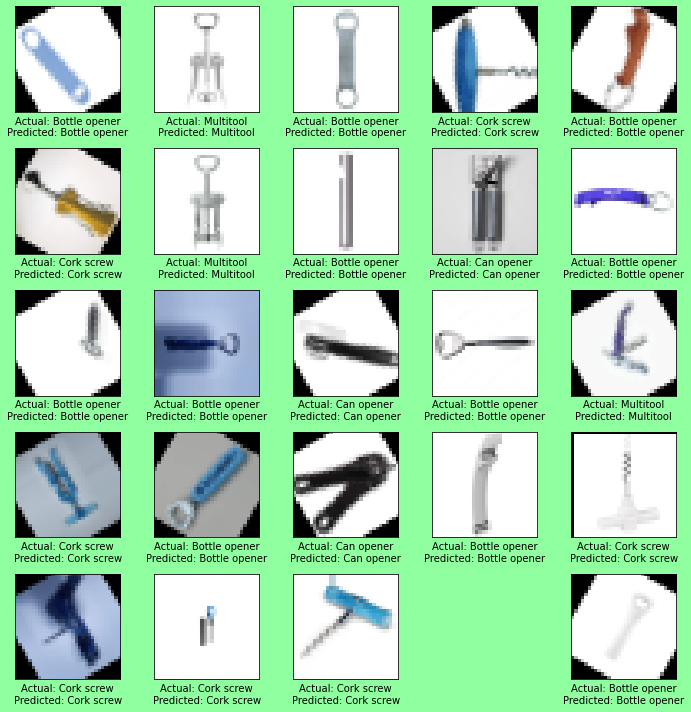

In [63]:
class_names = ['Bottle opener', 'Can opener', 'Cork screw', 'Multitool']
start = rnd.randint(0, len(original_images) - 25)

preds = model.predict(original_images[start:start+25])
index_max = []
for pred in preds:
    index_max.append(np.argmax(pred))

fig = plt.figure(figsize=(10, 10))
fig.patch.set_facecolor('xkcd:mint green')
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(original_images[i+start])
    plt.tight_layout()
    plt.xlabel(
        'Actual: ' + class_names[original_labels[i+start][0]] +
        '\nPredicted: ' + class_names[index_max[i]])

Is your specified object a "Multitool"?


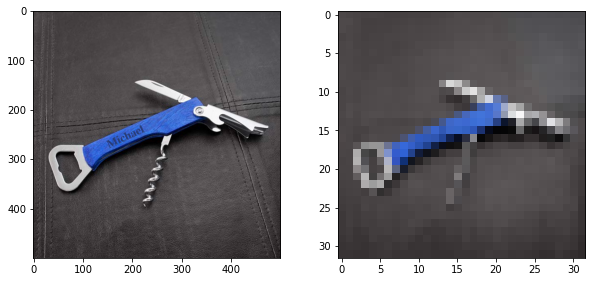

In [110]:
from DataAugmentation import resizeAndPad, rotations
import cv2

class_names = ['Bottle opener', 'Can opener', 'Cork screw', 'Multitool']
file_actual = cv2.imread(r'data/test/test.png', cv2.COLOR_BGR2RGB)

files = rotations(resizeAndPad(file_actual, (image_dim, image_dim)), 12)

prediction = model.predict(np.array(files))
index_max = np.bincount(np.array([np.argmax(pred) for pred in prediction])).argmax()

plt.figure(figsize=(10, 10))
plt.grid(False)
plt.subplot(2, 2, 1)
plt.imshow(file_actual)
plt.subplot(2, 2, 2)
plt.imshow(files[0])

print ('Is your specified object a "{}"?'.format(class_names[index_max]))

In [111]:
prediction

array([[ 0.        ,  0.        ,  0.6527843 ,  6.687993  ],
       [ 0.        ,  0.        ,  3.8712199 ,  0.        ],
       [ 0.        ,  5.387103  ,  0.        ,  0.        ],
       [ 0.51519334,  1.885973  ,  0.        ,  0.        ],
       [20.662508  , 12.609099  , 12.281627  , 12.061973  ],
       [ 0.        ,  2.3866944 ,  0.        ,  0.        ],
       [ 0.8204731 ,  0.03007895,  0.70895815,  2.3550901 ],
       [11.329803  ,  8.420769  ,  8.119399  , 13.601786  ],
       [ 4.520947  ,  2.7862782 ,  0.60258836,  1.3815246 ],
       [ 0.04804826,  0.50817853,  0.08902365,  1.9919673 ],
       [ 0.52788734,  0.        ,  0.7037052 ,  2.7602706 ],
       [ 5.996198  ,  4.3266397 ,  0.        ,  0.8054897 ]],
      dtype=float32)

In [18]:
from DataAugmentation import resizeAndPad, rotations
import HelperFunctions as hf
import cv2

class_names = ['Bottle opener', 'Can opener', 'Cork screw', 'Multitool']
imagePaths, classes = hf.load_images(os.path.join("data", "images", "test"))

for path in imagePaths:
    c = path.split(os.sep)[-2]
    name = path.split(os.sep)[-1]
    img = cv2.imread(path, cv2.COLOR_BGR2RGB)
    img = rotations(resizeAndPad(img, (image_dim, image_dim)), 6)

    prediction = model.predict(np.array(img))
    index_max = np.bincount(np.array([np.argmax(pred) for pred in prediction])).argmax()

    print(f"--> Prediction for file '{name}':\nActual:\t\t{class_names[classes[c]]}\nPredicted:\t{class_names[index_max]}\n")

--> Prediction for file '00c25ad620.jpg':
Actual:		Bottle opener
Predicted:	Bottle opener

--> Prediction for file '0b46e6187d.jpg':
Actual:		Bottle opener
Predicted:	Bottle opener

--> Prediction for file '0df8320d03.jpg':
Actual:		Bottle opener
Predicted:	Bottle opener

--> Prediction for file '0f3614c3e6.jpg':
Actual:		Bottle opener
Predicted:	Bottle opener

--> Prediction for file '0f7e34d536.jpg':
Actual:		Bottle opener
Predicted:	Bottle opener

--> Prediction for file '00f060de9a.jpg':
Actual:		Can opener
Predicted:	Can opener

--> Prediction for file '0abbd08fc3.jpg':
Actual:		Can opener
Predicted:	Can opener

--> Prediction for file '0fb51c07a9.jpg':
Actual:		Can opener
Predicted:	Can opener

--> Prediction for file '1c1c3b5042.jpg':
Actual:		Can opener
Predicted:	Can opener

--> Prediction for file '1e690ae408.jpg':
Actual:		Can opener
Predicted:	Can opener

--> Prediction for file '1b4c7dae21.jpg':
Actual:		Cork screw
Predicted:	Cork screw

--> Prediction for file '2bca52591b